In [2]:
# import all packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from pathlib import Path

**Descriptions (from source):** <br>
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

In [7]:
# Load the saved data from last step (Data Wrangling)
# First column contains no useful data so we set the index_col = 0
heart = pd.read_csv('heart_data_wrangling.csv', index_col=0)

In [8]:
# View data
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [9]:
# Recall that we convert 5 categorical features into numeric forms:
# 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'

**Descriptions (new):** <br>
- **Sex**: sex of the patient [0: Female, 1: Male]
- **ChestPainType**: chest pain type [0: Asymptomatic, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Typical Angina]
- **RestingECG**: resting electrocardiogram results [0: showing probable or definite left ventricular hypertrophy by Estes' criteria, 1: Normal, 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)]
- **ExerciseAngina**: exercise-induced angina [0: No, 1: Yes]
- **ST_Slope**: the slope of the peak exercise ST segment [0: downsloping, 1: flat, 2: upsloping]

In [15]:
# Summary statistics table
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,905.0,53.495028,9.432118,28.0,47.0,54.0,60.0,77.0
Sex,905.0,0.791160,0.406704,0.0,1.0,1.0,1.0,1.0
ChestPainType,905.0,0.783425,0.957938,0.0,0.0,0.0,2.0,3.0
RestingBP,905.0,132.049724,17.182028,80.0,120.0,130.0,140.0,185.0
Cholesterol,905.0,198.166851,107.164571,0.0,175.0,223.0,266.0,518.0
FastingBS,905.0,0.232044,0.422370,0.0,0.0,0.0,0.0,1.0
RestingECG,905.0,0.993370,0.631020,0.0,1.0,1.0,1.0,2.0
MaxHR,905.0,136.883978,25.294172,63.0,120.0,138.0,156.0,202.0
ExerciseAngina,905.0,0.404420,0.491051,0.0,0.0,0.0,1.0,1.0
Oldpeak,905.0,0.878785,1.050628,-2.6,0.0,0.5,1.5,5.6


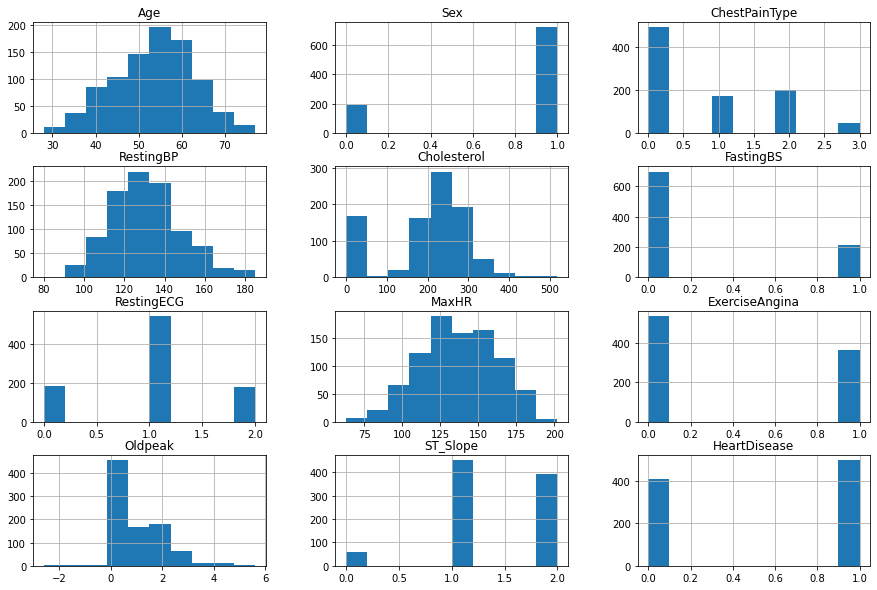

In [16]:
# Let's see histograms for each feature
hist_heart = heart.hist(bins=10, figsize=(15,10))

### Target feature

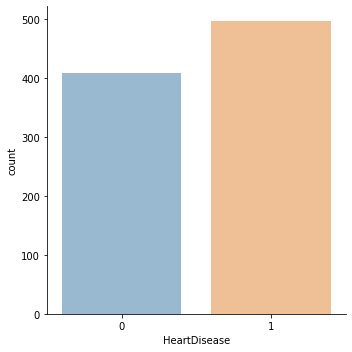

In [24]:
# Take a look at our target feature
target = sns.catplot(x='HeartDisease', data=heart, kind='count', alpha=0.5)
plt.show()

In [20]:
heart.HeartDisease.value_counts()

1    497
0    408
Name: HeartDisease, dtype: int64

In [22]:
heart.HeartDisease.value_counts(normalize=True)

1    0.549171
0    0.450829
Name: HeartDisease, dtype: float64

In our sample, around 55% of the people have heart diseases and 45% do not have.

### Categorical features vs target feature

HeartDisease         0         1
Sex                             
0             0.751323  0.248677
1             0.371508  0.628492


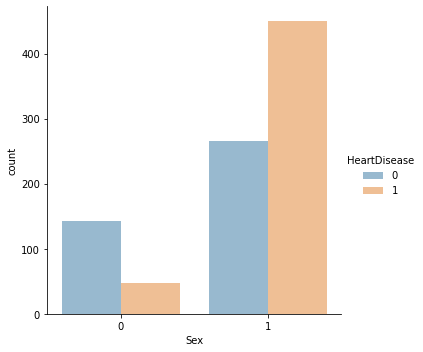

In [63]:
# 'Sex' vs 'HeartDisease'
fig, ax = plt.subplots()
print(pd.crosstab(heart.Sex, heart.HeartDisease, normalize='index'))
plt.close(1)
sex = sns.catplot(x='Sex', data=heart, kind='count', hue='HeartDisease', alpha=0.5)
plt.show()

Males (1) were more often diagnosed with a heart disease.

HeartDisease          0         1
ChestPainType                    
0              0.213115  0.786885
1              0.865497  0.134503
2              0.650000  0.350000
3              0.565217  0.434783


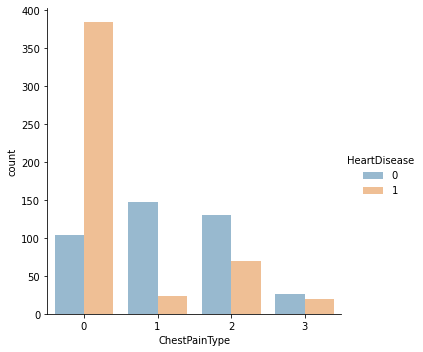

In [62]:
# 'ChestPainType' vs 'HeartDisease'
fig, ax = plt.subplots()
print(pd.crosstab(heart.ChestPainType, heart.HeartDisease, normalize='index'))
plt.close(1)
chest = sns.catplot(x='ChestPainType', data=heart, kind='count', hue='HeartDisease', alpha=0.5)
plt.show()

We can see that people with asymptomatic (0) chest pain type were more often diagnosed with a heart disease.

HeartDisease         0         1
RestingECG                      
0             0.442623  0.557377
1             0.488073  0.511927
2             0.344633  0.655367


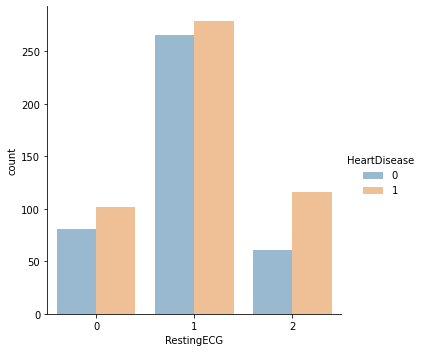

In [61]:
# 'RestingECG' vs 'HeartDisease'
fig, ax = plt.subplots()
print(pd.crosstab(heart.RestingECG, heart.HeartDisease, normalize='index'))
plt.close(1)
ECG = sns.catplot(x='RestingECG', data=heart, kind='count', hue='HeartDisease', alpha=0.5)
plt.show()

People having ST-T wave abnormality (2) were more often diagnosed with a heart disease.

HeartDisease         0         1
ST_Slope                        
0             0.233333  0.766667
1             0.172566  0.827434
2             0.804071  0.195929


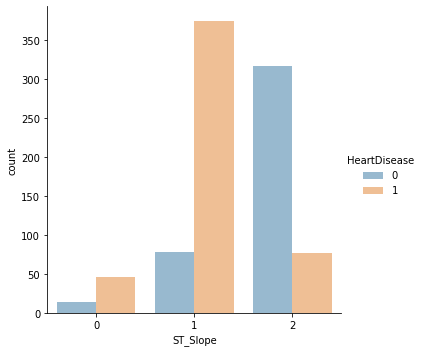

In [60]:
# 'ST_Slope' vs 'HeartDisease'
fig, ax = plt.subplots()
print(pd.crosstab(heart.ST_Slope, heart.HeartDisease, normalize='index'))
plt.close(1)
ST = sns.catplot(x='ST_Slope', data=heart, kind='count', hue='HeartDisease', alpha=0.5)
plt.show()

People with a flat (1) ST slope of peak exercise were more often diagnosed with a heart disease.

HeartDisease           0         1
ExerciseAngina                    
0               0.654917  0.345083
1               0.150273  0.849727


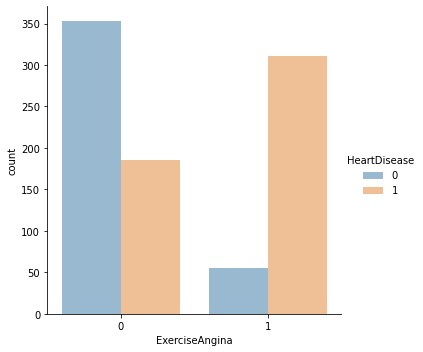

In [59]:
# 'ExerciseAngina' vs 'HeartDisease'
fig, ax = plt.subplots()
print(pd.crosstab(heart.ExerciseAngina, heart.HeartDisease, normalize='index'))
plt.close(1)
Angina = sns.catplot(x='ExerciseAngina', data=heart, kind='count', hue='HeartDisease', alpha=0.5)
plt.show()

People with exercise-induced angina (1) were more often diagnosed with a heart disease.

HeartDisease         0         1
FastingBS                       
0             0.523741  0.476259
1             0.209524  0.790476


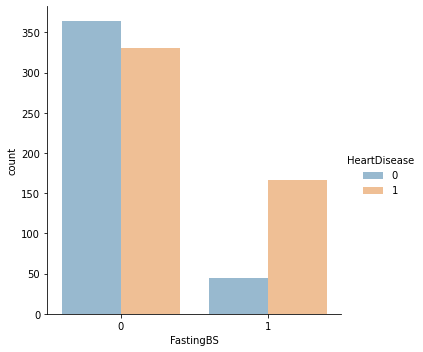

In [58]:
# 'FastingBS' vs 'HeartDisease'
fig, ax = plt.subplots()
print(pd.crosstab(heart.FastingBS, heart.HeartDisease, normalize='index'))
plt.close(1)
BS = sns.catplot(x='FastingBS', data=heart, kind='count', hue='HeartDisease', alpha=0.5)
plt.show()

People with fasting blood sugar > 120 mg/dl (1) were more often diagnosed with a heart disease.

### Categorical features vs People diagnosed with Heart Disease

In [ ]:
# See representations of different categorical features in relation to positive diagnosis

In [117]:
# Get proportion of each criteria in 'Sex'
sex = heart[heart['HeartDisease'] == 1]['Sex'].value_counts(normalize=True)
sex = [sex[0]*100, sex[1]*100]
# Get proportion of each criteria in 'ChestPainType'
chestpain = heart[heart['HeartDisease'] == 1]['ChestPainType'].value_counts(normalize=True)
chestpain = [chestpain[0]*100, chestpain[1]*100, chestpain[2]*100, chestpain[3]*100]
# Get proportion of each criteria in 'RestingECG'
restingECG = heart[heart['HeartDisease'] == 1]['RestingECG'].value_counts(normalize=True)
restingECG = [restingECG[0]*100, restingECG[1]*100, restingECG[2]*100]
# Get proportion of each criteria in 'ST_Slope'
st_slope = heart[heart['HeartDisease'] == 1]['ST_Slope'].value_counts(normalize=True)
st_slope = [st_slope[0]*100, st_slope[1]*100, st_slope[2]*100]
# Get proportion of each criteria in 'ExerciseAngina'
exercise_angina = heart[heart['HeartDisease'] == 1]['ExerciseAngina'].value_counts(normalize=True)
exercise_angina = [exercise_angina[0]*100, exercise_angina[1]*100]
# Get proportion of each criteria in 'FastingBS'
fastingbs = heart[heart['HeartDisease'] == 1]['FastingBS'].value_counts(normalize=True)
fastingbs = [fastingbs[0]*100, fastingbs[1]*100]

Text(0.5, 1.0, 'FastingBS')

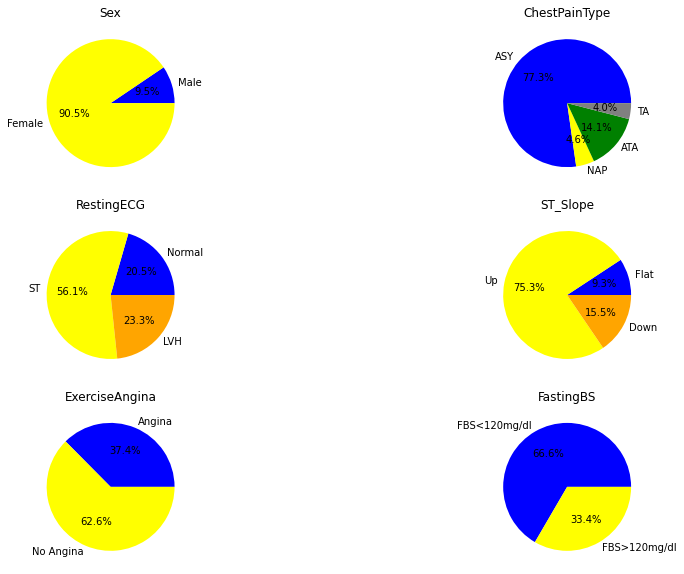

In [136]:
# Make pie charts representations
ax, fig = plt.subplots(nrows = 4, ncols = 2, figsize = (15,10))
# 'Sex' pie chart
plt.subplot(321)
plt.pie(sex, labels = ['Male', 'Female'], autopct = '%1.1f%%', colors = ['blue', 'yellow'])
plt.title('Sex')
# 'ChestPainType' pie chart
plt.subplot(322)
plt.pie(chestpain, labels = ['ASY', 'NAP', 'ATA', 'TA'], autopct = '%1.1f%%', colors = ['blue', 'yellow', 'green', 'grey'])
plt.title('ChestPainType')
# 'RestingECG' pie chart
plt.subplot(323)
plt.pie(restingECG, labels = ['Normal', 'ST', 'LVH'], autopct = '%1.1f%%', colors = ['blue', 'yellow', 'orange'])
plt.title('RestingECG')
# 'ST_Slope' pie chart
plt.subplot(324)
plt.pie(st_slope, labels = ['Flat', 'Up', 'Down'], autopct = '%1.1f%%', colors = ['blue', 'yellow', 'orange'])
plt.title('ST_Slope')
# 'ExerciseAngina' pie chart
plt.subplot(325)
plt.pie(exercise_angina, labels = ['Angina', 'No Angina'], autopct = '%1.1f%%', colors = ['blue', 'yellow'])
plt.title('ExerciseAngina')
# 'FastingBS' pie chart
plt.subplot(326)
plt.pie(fastingbs, labels = ['FBS<120mg/dl', 'FBS>120mg/dl'], autopct = '%1.1f%%', colors = ['blue', 'yellow'])
plt.title('FastingBS')

- The majority of people diagnosed with heart diseases is Male
- The majority of people diagnosed with heart diseases has chest pain type as 'Asymptomatic'
- The majority of people diagnosed with heart diseases has resting ECG as 'having ST-T wave abnormality'
- The majority of people diagnosed with heart diseases has slope of the peak exercise ST segmentas as 'Up'
- The majority of people diagnosed with heart diseases does not have exercise-induced Angima
- The majority of people diagnosed with heart diseases has fasting blood sugar less than 120mg/dl

### Numeric features vs Target feature

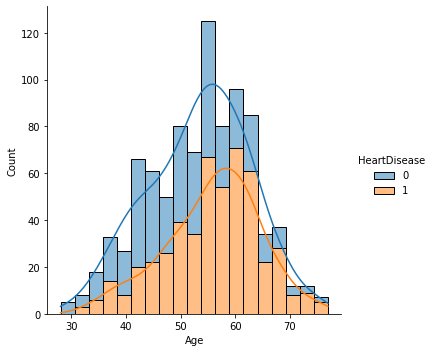

In [69]:
# Distribution plot between 'Age' and 'HeartDisease'
age = sns.displot(data=heart, x='Age', hue='HeartDisease', alpha=0.5, multiple='stack', kde=True)
plt.show()

In [78]:
# Create a function to plot all distributions against HeartDisease
def dist(x):
    return sns.displot(data=heart, x=x, hue='HeartDisease', alpha=0.5, multiple='stack', kde=True)

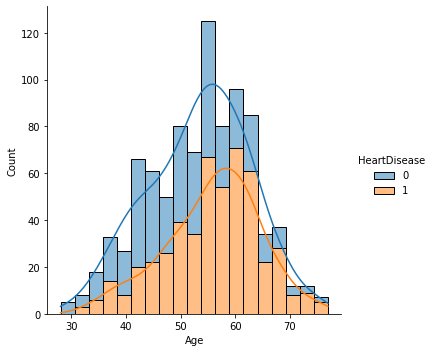

In [79]:
# 'Age'
dist('Age')

Older people were more often diagnosed with a heart disease.

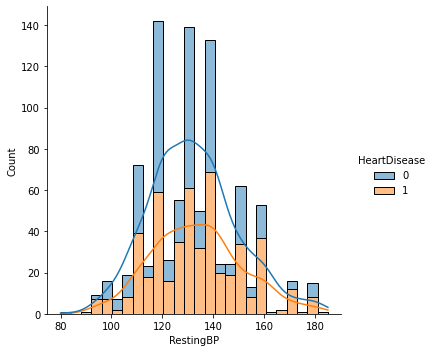

In [80]:
# 'RestingBP'
dist('RestingBP')

People with higher Resting Blood Pressure were more often diagnosed with a heart disease.

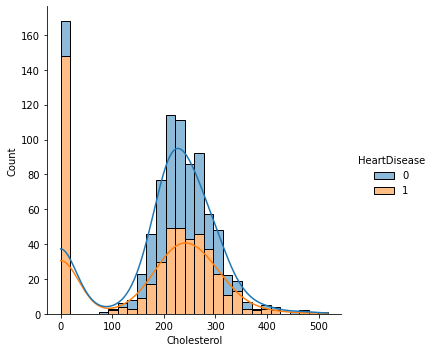

In [84]:
# 'Cholestoral'
dist('Cholesterol')

In [87]:
heart.Cholesterol.value_counts()

0      168
254     11
220     10
223     10
211      9
      ... 
392      1
466      1
316      1
153      1
131      1
Name: Cholesterol, Length: 219, dtype: int64

There are 168 observations with cholesterol = 0, these should be missing values

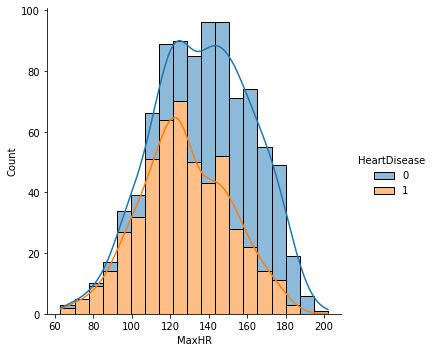

In [88]:
# 'MaxHR'
dist('MaxHR')

People with lower Maximum Heart Rate were more often diagnosed with a heart disease.

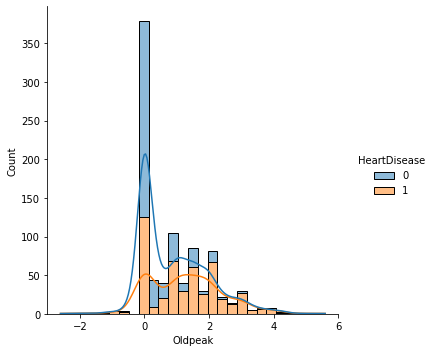

In [89]:
# 'Oldpeak'
dist('Oldpeak')

People with higher depression values were more often diagnosed with a heart disease.

### Relationships

In [90]:
# See correlations
heart.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.065909,-0.080555,0.270310,-0.092831,0.197158,-0.002979,-0.394011,0.215146,0.255082,-0.265906,0.284092
Sex,0.065909,1.000000,-0.130418,0.018267,-0.205112,0.121427,0.063564,-0.188816,0.196274,0.128899,-0.164000,0.310278
ChestPainType,-0.080555,-0.130418,1.000000,-0.002840,0.074349,-0.072504,-0.077408,0.293427,-0.352117,-0.174714,0.210318,-0.385878
RestingBP,0.270310,0.018267,-0.002840,1.000000,0.110401,0.058922,0.037576,-0.111101,0.152322,0.167245,-0.066398,0.104396
Cholesterol,-0.092831,-0.205112,0.074349,0.110401,1.000000,-0.276750,-0.190836,0.233564,-0.038533,0.049722,0.119754,-0.237671
FastingBS,0.197158,0.121427,-0.072504,0.058922,-0.276750,1.000000,0.088787,-0.128872,0.053718,0.050243,-0.170108,0.266578
RestingECG,-0.002979,0.063564,-0.077408,0.037576,-0.190836,0.088787,1.000000,-0.171718,0.080062,-0.004050,-0.016794,0.060899
MaxHR,-0.394011,-0.188816,0.293427,-0.111101,0.233564,-0.128872,-0.171718,1.000000,-0.381137,-0.174363,0.349553,-0.406483
ExerciseAngina,0.215146,0.196274,-0.352117,0.152322,-0.038533,0.053718,0.080062,-0.381137,1.000000,0.415676,-0.430973,0.497750
Oldpeak,0.255082,0.128899,-0.174714,0.167245,0.049722,0.050243,-0.004050,-0.174363,0.415676,1.000000,-0.494273,0.407839


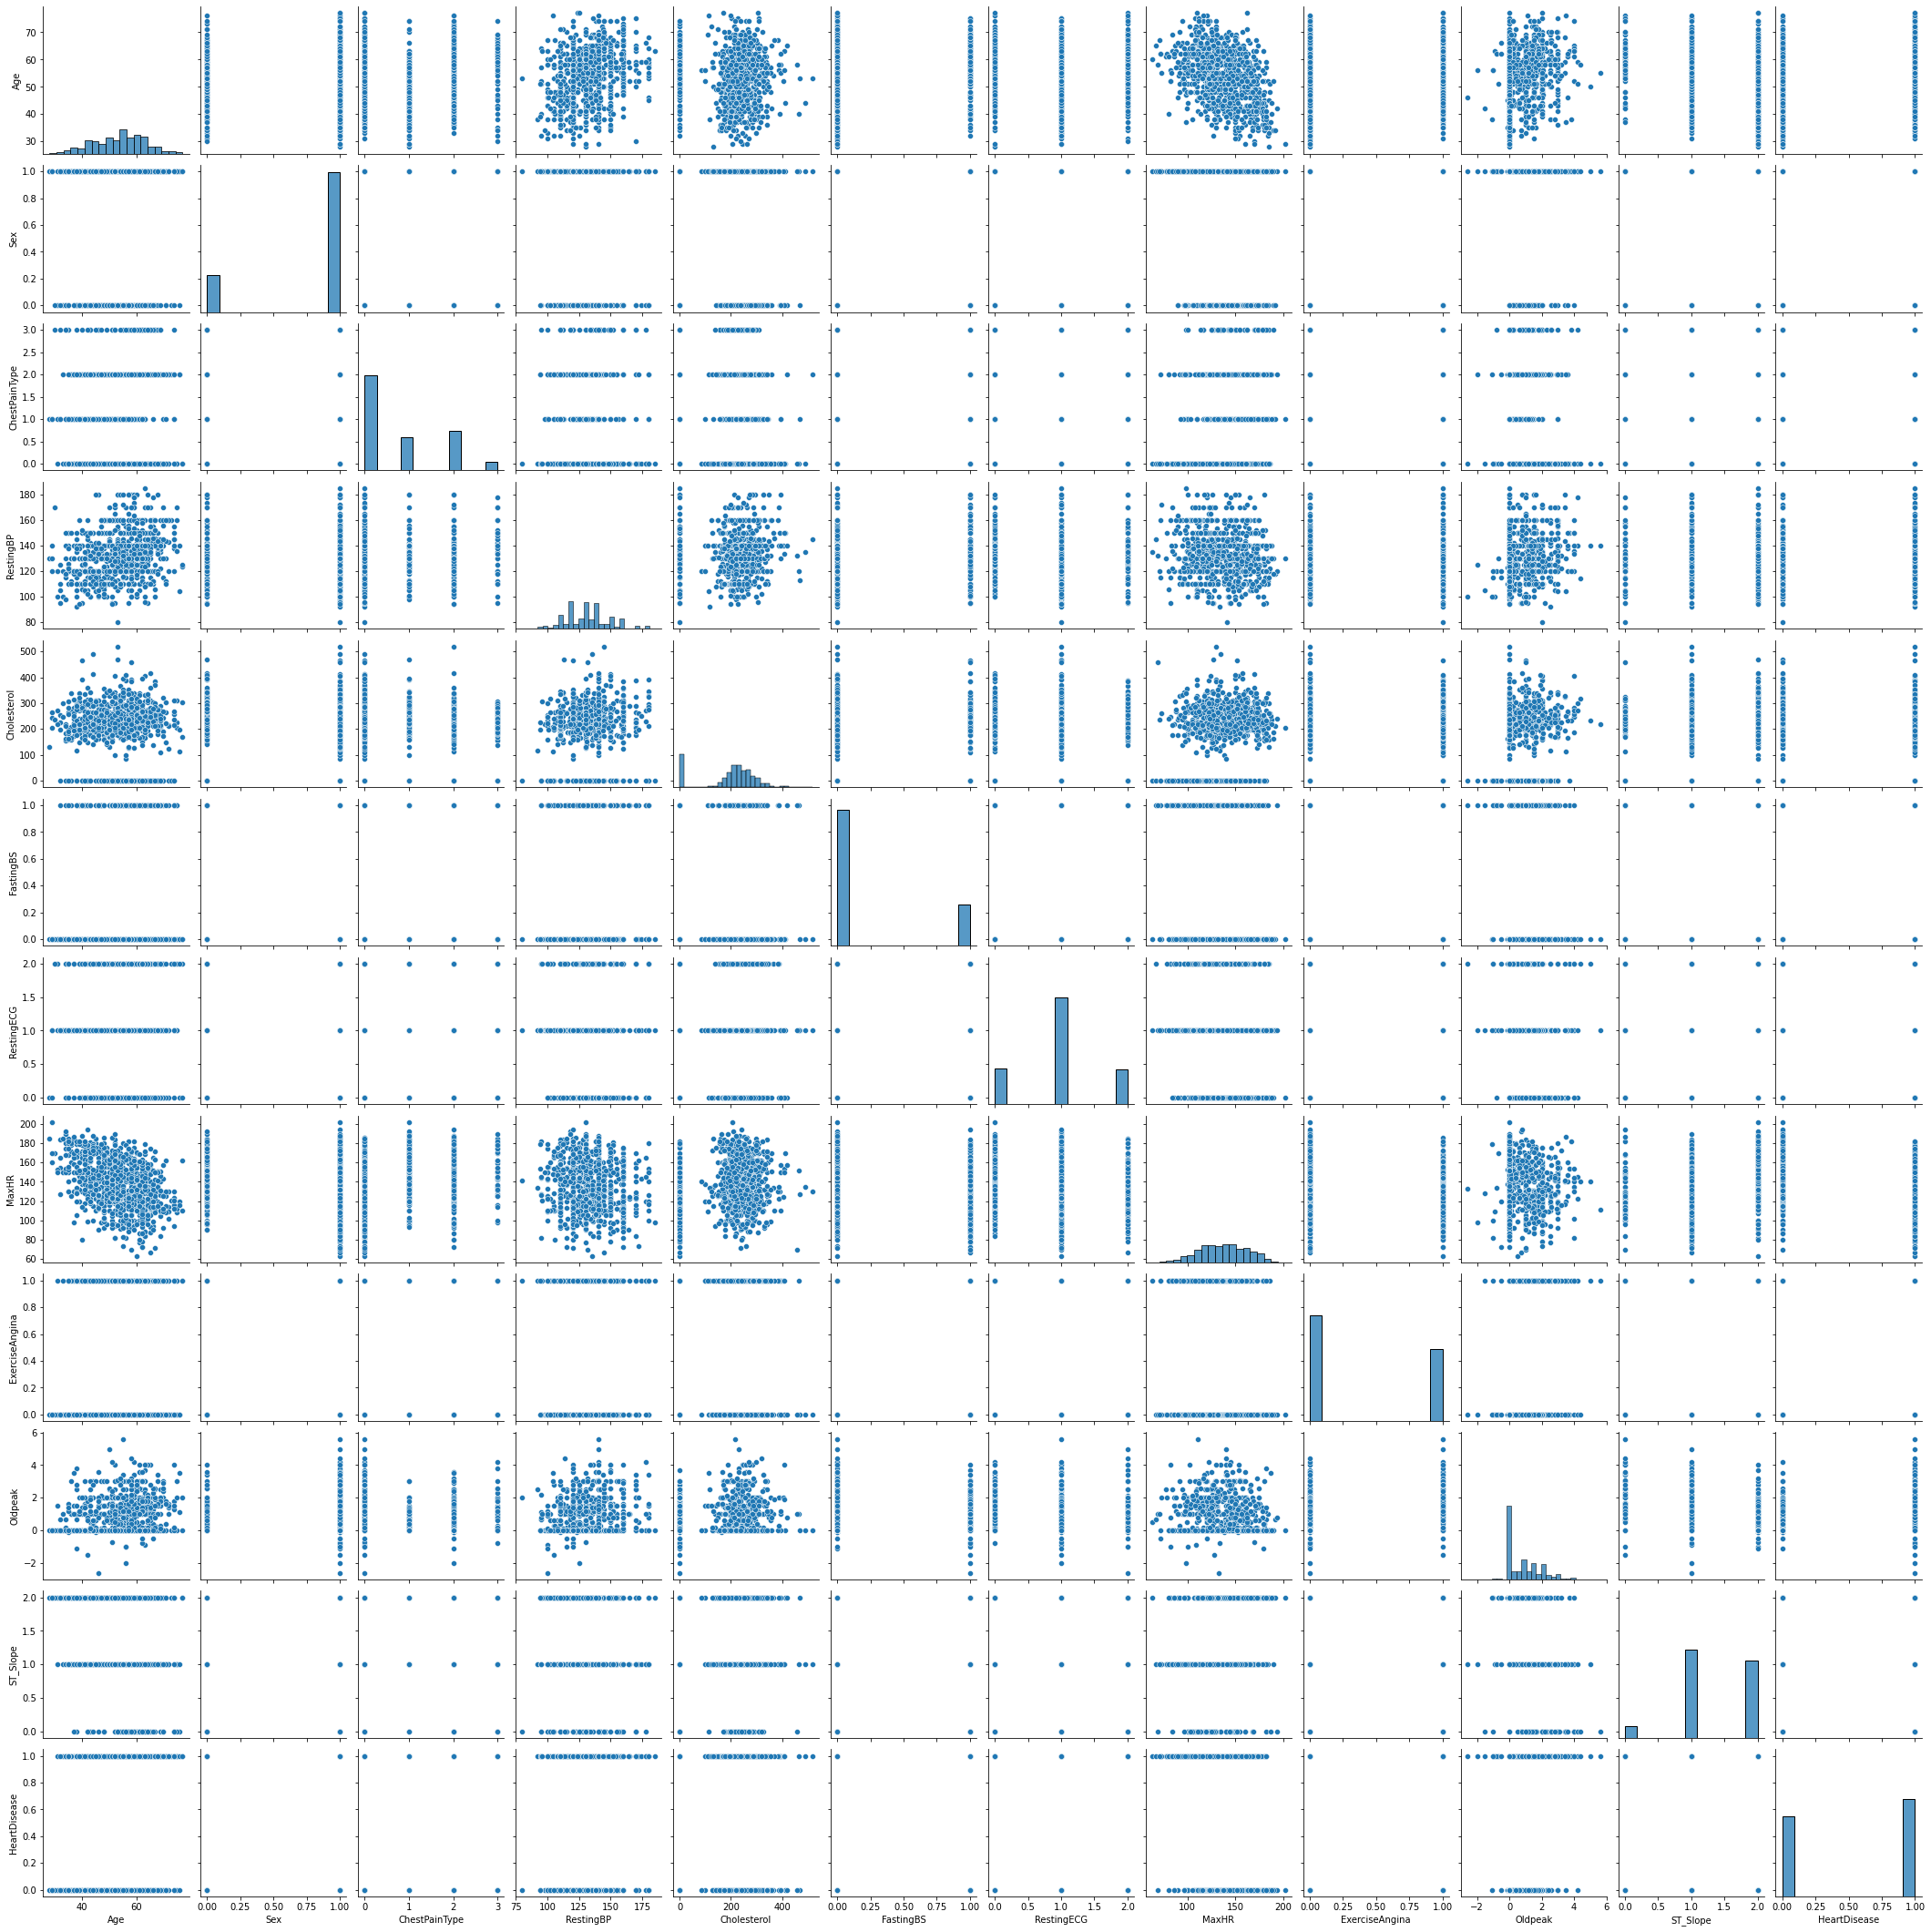

In [91]:
# Pairplot the relationships
sns.pairplot(heart)

<AxesSubplot:>

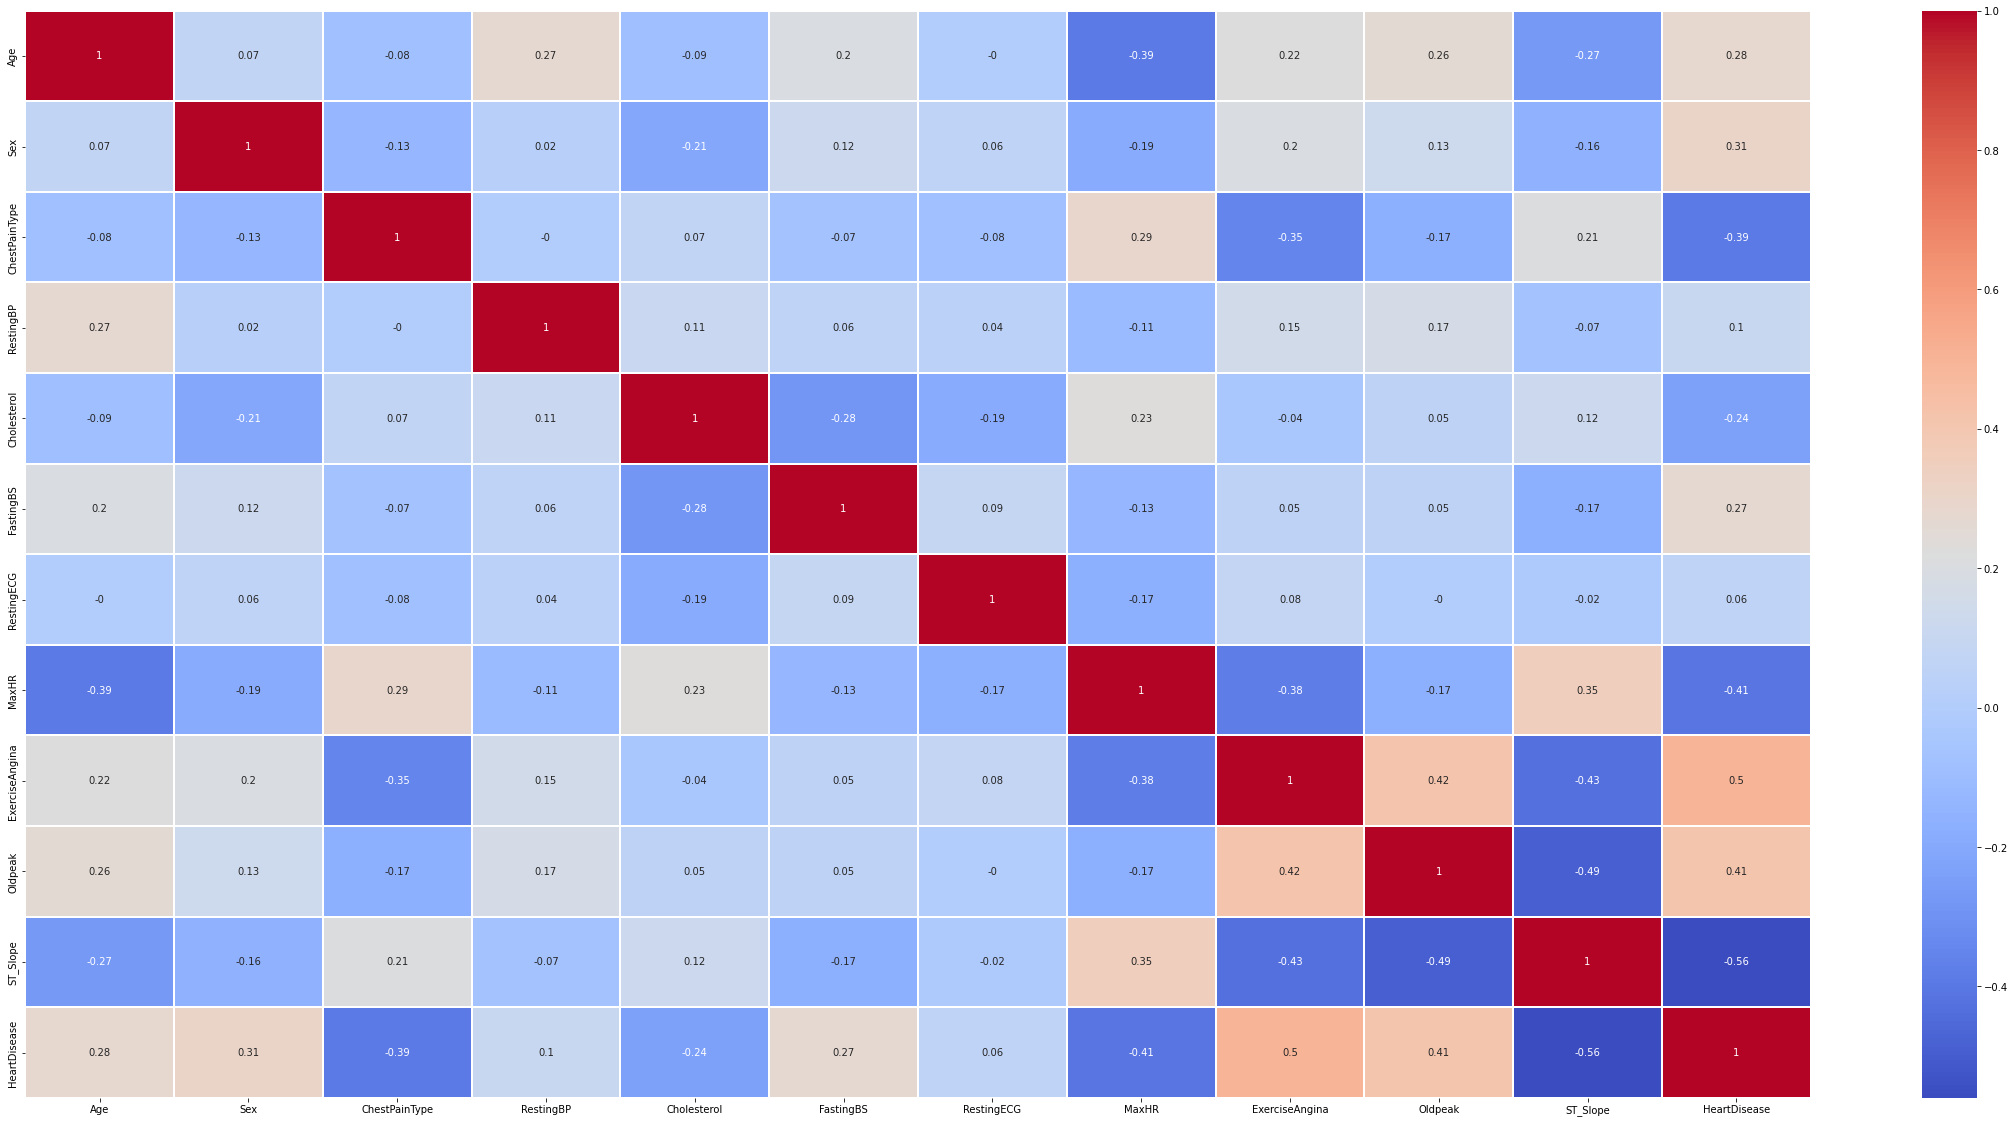

In [144]:
# Make a heatmap
plt.figure(figsize=(40,20))
sns.heatmap(round(heart.corr(),2), annot=True, cmap="coolwarm", linewidths=.05)

In [145]:
# Save the file
datapath = Path('/Users/bq/Desktop/Bootcamp/Capstone_2/heart_EDA.csv')
heart.to_csv(datapath)